The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

# **Imports**

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# **Acquire**

In [3]:
#specifiying column names and bring in the dataset. 
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
# reading the csv
df = pd.read_csv("anonymized-curriculum-access-07-2021.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018810 entries, 0 to 1018809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1018810 non-null  object 
 1   endpoint   1018809 non-null  object 
 2   user_id    1018810 non-null  int64  
 3   cohort_id  965313 non-null   float64
 4   source_ip  1018810 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.9+ MB


# **Prepare**

In [5]:
#changing the datatype of date from onbject to datetime.
df.date = pd.to_datetime(df.date)

In [6]:
#setting the date to the index.
df.set_index('date', inplace = True)

In [7]:
df.head()

,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [15]:
#creating new field called pages this is enpoint resampled(groupby) daily count.
pages = df.endpoint.resample('d').count()
pages2 = df.endpoint.resample('1W').count()

In [16]:
df.head()

,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


<AxesSubplot:xlabel='date'>

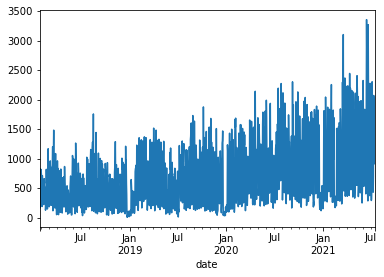

In [17]:
#looking at page access daily, can see that there was dips during the holidays.
pages.plot()

<AxesSubplot:xlabel='date'>

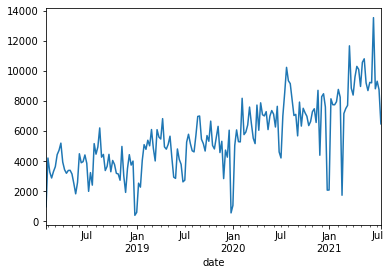

In [18]:
#practicing reducing noise.
pages2.plot()

### So from here need to calculate variabales needed to explore anomalies

In order to calculate Bollinger bands and %bandwith need the follwing:

- Midband
- Upper and Lower Band

**Percent Bandwith**

- $\%b = \frac{last-LB}{UB-LB}$ 

- %b > 1 => point lies above UB

- %b < 0 => point lies below LB

- %b == .5 => point lies on the midband. 

In [20]:
#start with setting the window span.
#window span
span = 30

In [29]:
#calculate the midbadn using .ewm(span = #).mean()
#since upper bound and lower bound need std can calculate std.

midband = pages.ewm(span = 30).mean()
std = pages.ewm(span = 30).std()

In [30]:
#Here I cam calculating the bollinger bands: Midband, then ub and lb.
#upper is midband + std * number of std's
upper_band = midband + std * 3
#lowerbound is midband -std * std
lower_band = midband - std * 3

In [34]:
#so from here I want to concat everything into a df
df_1 = pd.concat([pages,midband,upper_band,lower_band], axis = 1)

In [35]:
# renaming the columns
df_1.columns = ['pages', 'midband', 'upperband', 'lowerband']

In [36]:
df_1.head(1)

,pages,midband,upperband,lowerband
date,,,,
2018-01-26,572,572.0,NaN,NaN


### Main Takeaways:
- Cleaned up my dataset, changed date to timedate type and set it to index.
- From there needed to figure the number of pages from endpoint so created a variable called pages which is a  groupby  of day and got the daily count by day.
- From there wanted to calculated bollinger bands but first needed to start with the mid band. So to calculate the mid band, first started with using the pages variable and .ewm() set the span to a value of 30 days, span being the number of time periods in this case 30 days and then took the mean.
- Result: midband = pages.ewm(span = 30).mean()
- Next: calculated the upper and lower bands. This is done utilizing the ub = midband + std * K which K being the number of std. For lb the equation is midband - std * K.
- Last: concated all the variables I created into a df, then did some house cleaning by changing column names.

In [38]:
df_1.head()

,pages,midband,upperband,lowerband
date,,,,
2018-01-26,572,572.000000,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557
2018-01-28,170,315.139578,956.773991,-326.494835
2018-01-29,830,457.002386,1406.405897,-492.401124
2018-01-30,652,501.369064,1354.808245,-352.070116


# Plotting Bollinger Bands

Text(0, 0.5, 'Number of pages')

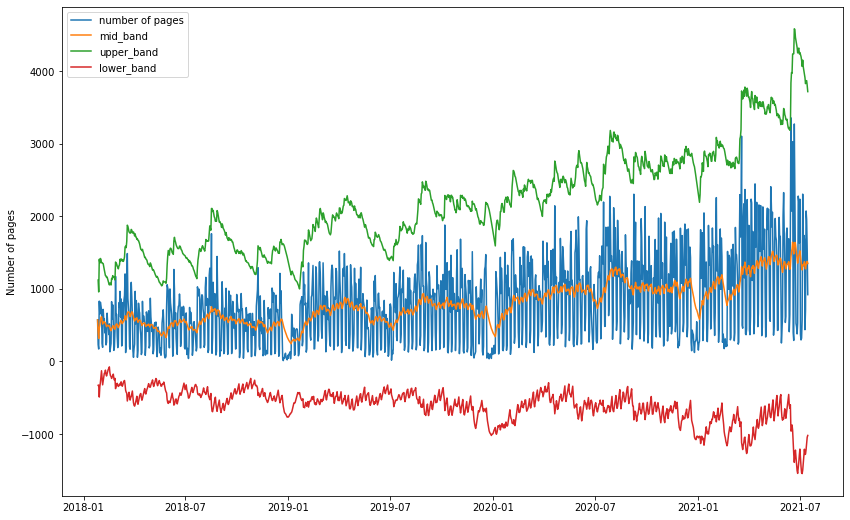

In [40]:
#practice plotting the bands
fig, ax = plt.subplots(figsize = (14,9))
ax.plot(df_1.index, df_1.pages, label = "number of pages")
ax.plot(df_1.index, df_1.midband, label = 'mid_band')
ax.plot(df_1.index, df_1.upperband, label = 'upper_band')
ax.plot(df_1.index, df_1.lowerband, label = 'lower_band')
ax.legend(loc = 'best')
ax.set_ylabel('Number of pages')

**Percent Bandwith**

- $\%b = \frac{last-LB}{UB-LB}$ 

- %b > 1 => point lies above UB

- %b < 0 => point lies below LB

- %b == .5 => point lies on the midband. 

In [41]:
#created a new feature within the df_1 dataframe which is called Percent bandwith
df_1['Percent_bandwith'] = (df_1.pages - df_1.lowerband)/(df_1.upperband - df_1.lowerband)

In [42]:
df_1.head(5)

,pages,midband,upperband,lowerband,Percent_bandwith
date,,,,,
2018-01-26,572,572.000000,NaN,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557,0.386077
2018-01-28,170,315.139578,956.773991,-326.494835,0.386899
2018-01-29,830,457.002386,1406.405897,-492.401124,0.696438
2018-01-30,652,501.369064,1354.808245,-352.070116,0.588249


In [43]:
# So inorder for a value to be considered an anomalies it needs to be greater than 1.
# The percent value indicates where the value sits relative to the lower band.
# 0 being lower band, 0.5, being mid band and 1 being the upper band.
df_1[df_1.Percent_bandwith > 1]

,pages,midband,upperband,lowerband,Percent_bandwith
date,,,,,


In [74]:
def acquire(file_name, column_names):
    return pd.read_csv(file_name, sep="\s", header=None, names=column_names, usecols=[0, 2, 3, 4, 5])

def prep(df, user):
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['endpoint'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    upperband = midband + stdev * weight
    lowerband = midband - stdev * weight
    bb = pd.concat([upperband, lowerband], axis=1)
    df_1 = pd.concat([pages, midband, bb], axis=1)
    df_1.columns = ['pages', 'midband', 'upperband', 'lowerband']
    df_1['percent_bandwith'] = (df_1['pages'] - df_1['lowerband'])/(df_1['upperband'] - df_1['lowerband'])
    df_1['user_id'] = user
    return df_1

def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(df_1.index, df_1.pages, label='Number of Pages, User: '+str(user))
    ax.plot(df_1.index, df_1.midband, label = 'EMA/midband')
    ax.plot(df_1.index, df_1.ub, label = 'Upper Band')
    ax.plot(df_1.index, df_1.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()
    
def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    df_1 = compute_pct_b(pages, span, weight, user)
#     plt_bands(my_df, user)
    return df_1[df_1.percent_bandwith > 1]

# **Acquire**

In [75]:
#specifying file name and colnames to use in function
file_name = "anonymized-curriculum-access-07-2021.txt"
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']

In [76]:
#acquiring the dataset
df = acquire(file_name, colnames)

In [77]:
# get the last measure of gb
last_measure = df_1.iloc[-1].pages
last_measure

919.0

In [78]:
# get the lower band value on the last date
last_lb = df_1.iloc[-1].lowerband
last_lb

-1021.4076601733216

In [79]:
# get the upper band value on the last date
last_ub = df_1.iloc[-1].upperband
last_ub

3717.907020003997

In [80]:
# compute %b
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))

%b for last datapoint:  0.41


In [81]:
user = 350
span = 30
weight = 3

In [82]:
anomalies = pd.DataFrame()
user_df = find_anomalies(df,user,span,weight)
anomalies = pd.concat([anomalies,user_df],axis = 0)

In [85]:
#need to loop through all users
span = 30
weight = 3
#create empty dtaframe
anomlaies = pd.DataFrame()
#specifying for x in list of unique user ids
for user in list(df.user_id.unique()):
    user_df = find_anomalies(df,user, span,weight)
    anomalies = pd.concat([anomalies,user_df], axis = 0)

In [86]:
anomalies

,pages,midband,upperband,lowerband,percent_bandwith,user_id
date,,,,,,
2018-02-20,54,6.456745,50.349000,-37.435509,1.041590,1
2018-05-29,68,9.612443,62.374629,-43.149742,1.053309,1
2018-11-07,13,1.221442,11.524503,-9.081619,1.071605,1
2018-12-19,25,2.880262,22.002760,-16.242235,1.078369,1
2019-01-29,44,3.623334,36.587343,-29.340675,1.112436,1
...,...,...,...,...,...,...
2021-06-16,69,10.106888,63.458154,-43.244379,1.051937,988
2021-07-12,78,13.544620,75.511508,-48.422269,1.020079,991
2021-07-06,30,3.909115,27.738774,-19.920545,1.047446,994


# **Explore**

In [88]:
anomalies.pages.value_counts(sort =False)

2       73
4      128
6       93
8       94
10      67
      ... 
225      1
253      1
271      1
285      1
343      1
Name: pages, Length: 144, dtype: int64

In [90]:
anomalies[anomalies.pages == 271]

,pages,midband,upperband,lowerband,percent_bandwith,user_id
date,,,,,,
2020-04-16,271,44.194413,267.834945,-179.44612,1.007076,570


In [91]:
anomalies[anomalies == 253]

,pages,midband,upperband,lowerband,percent_bandwith,user_id
date,,,,,,
2018-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-29,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-07,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-19,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-12,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-06,NaN,NaN,NaN,NaN,NaN,NaN
